In [2]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 11.3 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=2576e617483f57fbed36accdde9b9da5c55c540151dc84417e942f0ef8396264
  Stored in directory: /root/.cache/pip/wheels/b1/59/a0/a1a0624b5e865fd389919c1a10f53aec9b12195d6747710baf
Successfully built pyspark
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The followin

In [3]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

headers = ['class', 'largestSpot', 'spotDistribution', 'activity', 'evolution', 'previousActivity', 'complex',
           'complexOnPath', 'area', 'largestSpotArea', 'c-class', 'm-class', 'x-class']

df = pd.read_csv('SolarFlare_Clean.csv', header=None, names=headers)

df.head()

,class,largestSpot,spotDistribution,activity,evolution,previousActivity,complex,complexOnPath,area,largestSpotArea,c-class,m-class,x-class
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
activity,1066.0,1.153846,0.360971,1.0,1.0,1.0,1.0,2.0
evolution,1066.0,2.401501,0.620584,1.0,2.0,2.0,3.0,3.0
previousActivity,1066.0,1.059099,0.320324,1.0,1.0,1.0,1.0,3.0
complex,1066.0,1.404315,0.490989,1.0,1.0,1.0,2.0,2.0
complexOnPath,1066.0,1.875235,0.330608,1.0,2.0,2.0,2.0,2.0
area,1066.0,1.025328,0.157194,1.0,1.0,1.0,1.0,2.0
largestSpotArea,1066.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
c-class,1066.0,0.300188,0.835784,0.0,0.0,0.0,0.0,8.0
m-class,1066.0,0.046904,0.302811,0.0,0.0,0.0,0.0,5.0
x-class,1066.0,0.005629,0.086487,0.0,0.0,0.0,0.0,2.0


In [5]:
df.drop(['largestSpotArea'], axis = 1, inplace = True)

In [6]:
df.head()

,class,largestSpot,spotDistribution,activity,evolution,previousActivity,complex,complexOnPath,area,c-class,m-class,x-class
0,H,A,X,1,3,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,0,0,0
2,C,S,O,1,3,1,1,2,1,0,0,0
3,H,R,X,1,2,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,0,0,0


In [7]:
m_class = df.drop(["c-class", "x-class"], axis=1)
# M-Class correlation analysis.
m_class.corr()

,activity,evolution,previousActivity,complex,complexOnPath,area,m-class
activity,1.000000,0.000645,0.400409,0.279160,0.145256,0.245672,0.114317
evolution,0.000645,1.000000,-0.015562,-0.160388,0.029288,0.068912,0.074575
previousActivity,0.400409,-0.015562,1.000000,0.164349,0.069692,0.268607,0.135960
complex,0.279160,-0.160388,0.164349,1.000000,0.073891,0.195669,0.099685
complexOnPath,0.145256,0.029288,0.069692,0.073891,1.000000,0.060864,0.049131
area,0.245672,0.068912,0.268607,0.195669,0.060864,1.000000,0.251184
m-class,0.114317,0.074575,0.135960,0.099685,0.049131,0.251184,1.000000


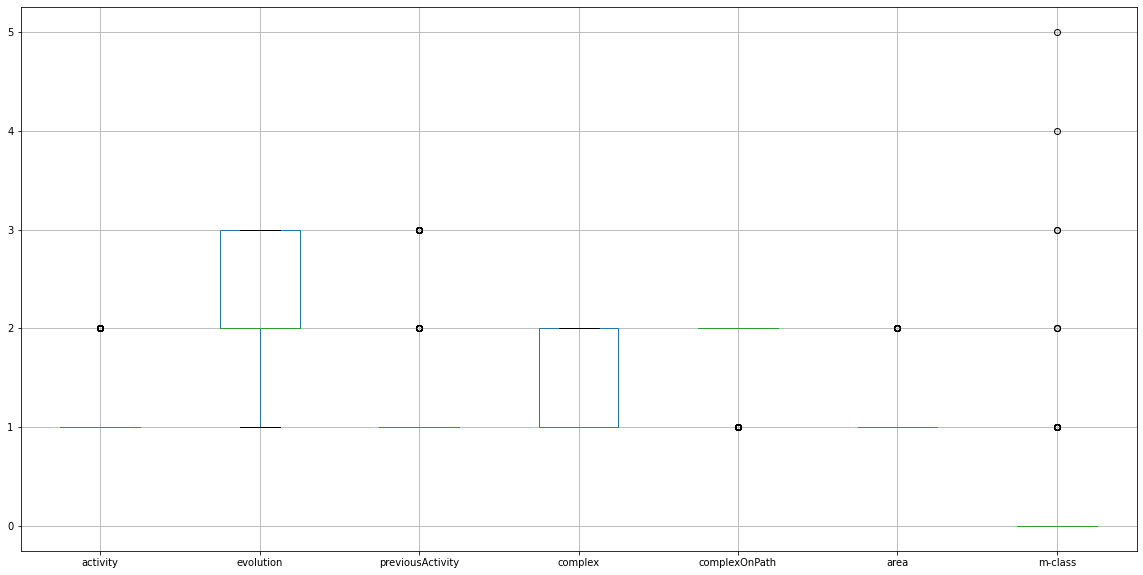

In [9]:
# Boxplot of of M-Class correlation analysis.
m_class.boxplot(figsize=(20, 10))

In [ ]:
conf = SparkConf().set("spark.ui.port", "4050")

sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()


In [ ]:
from pyspark.ml.feature import VectorAssembler
py_mClass = spark.createDataFrame(m_class)


In [35]:
py_mClass.columns

['class',
 'largestSpot',
 'spotDistribution',
 'activity',
 'evolution',
 'previousActivity',
 'complex',
 'complexOnPath',
 'area',
 'm-class']

In [40]:
assembler = VectorAssembler(inputCols=['activity','evolution','previousActivity','complex','complexOnPath','area'], outputCol="features")
output = assembler.transform(py_mClass)
output.show()

+-----+-----------+----------------+--------+---------+----------------+-------+-------------+----+-------+--------------------+
|class|largestSpot|spotDistribution|activity|evolution|previousActivity|complex|complexOnPath|area|m-class|            features|
+-----+-----------+----------------+--------+---------+----------------+-------+-------------+----+-------+--------------------+
|    H|          A|               X|       1|        3|               1|      1|            1|   1|      0|[1.0,3.0,1.0,1.0,...|
|    D|          R|               O|       1|        3|               1|      1|            2|   1|      0|[1.0,3.0,1.0,1.0,...|
|    C|          S|               O|       1|        3|               1|      1|            2|   1|      0|[1.0,3.0,1.0,1.0,...|
|    H|          R|               X|       1|        2|               1|      1|            1|   1|      0|[1.0,2.0,1.0,1.0,...|
|    H|          S|               X|       1|        1|               1|      1|            2|   

In [42]:
output.select("features", "m-class").show()

+--------------------+-------+
|            features|m-class|
+--------------------+-------+
|[1.0,3.0,1.0,1.0,...|      0|
|[1.0,3.0,1.0,1.0,...|      0|
|[1.0,3.0,1.0,1.0,...|      0|
|[1.0,2.0,1.0,1.0,...|      0|
|[1.0,1.0,1.0,1.0,...|      0|
|[1.0,2.0,1.0,1.0,...|      0|
|[1.0,3.0,1.0,1.0,...|      0|
|[1.0,3.0,1.0,1.0,...|      0|
|[1.0,2.0,1.0,1.0,...|      0|
|[1.0,3.0,1.0,1.0,...|      0|
|[1.0,2.0,1.0,1.0,...|      0|
|[1.0,3.0,1.0,1.0,...|      0|
|[1.0,2.0,1.0,1.0,...|      0|
|[2.0,2.0,1.0,1.0,...|      0|
|[1.0,3.0,1.0,1.0,...|      0|
|[1.0,2.0,1.0,1.0,...|      0|
|[1.0,3.0,1.0,1.0,...|      0|
|[1.0,3.0,1.0,1.0,...|      0|
|[1.0,2.0,1.0,1.0,...|      0|
|[1.0,2.0,1.0,2.0,...|      0|
+--------------------+-------+
only showing top 20 rows



In [47]:
mClass_model = output.select("features", "m-class")

trainingData, testData = mClass_model.randomSplit([0.7, 0.3])


In [53]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [51]:
classifier = DecisionTreeClassifier(labelCol="m-class").fit(trainingData)
prediction = classifier.transform(testData)
prediction.show()

+--------------------+-------+--------------------+--------------------+----------+
|            features|m-class|       rawPrediction|         probability|prediction|
+--------------------+-------+--------------------+--------------------+----------+
|[1.0,1.0,1.0,1.0,...|      0|[689.0,21.0,3.0,2...|[0.96229050279329...|       0.0|
|[1.0,1.0,1.0,1.0,...|      0|[689.0,21.0,3.0,2...|[0.96229050279329...|       0.0|
|[1.0,1.0,1.0,1.0,...|      0|[689.0,21.0,3.0,2...|[0.96229050279329...|       0.0|
|[1.0,1.0,1.0,1.0,...|      0|[689.0,21.0,3.0,2...|[0.96229050279329...|       0.0|
|[1.0,1.0,1.0,1.0,...|      0|[689.0,21.0,3.0,2...|[0.96229050279329...|       0.0|
|[1.0,1.0,1.0,1.0,...|      0|[689.0,21.0,3.0,2...|[0.96229050279329...|       0.0|
|[1.0,1.0,1.0,1.0,...|      0|[689.0,21.0,3.0,2...|[0.96229050279329...|       0.0|
|[1.0,1.0,1.0,1.0,...|      0|[689.0,21.0,3.0,2...|[0.96229050279329...|       0.0|
|[1.0,1.0,1.0,1.0,...|      0|[689.0,21.0,3.0,2...|[0.96229050279329...|    

In [54]:
accuracy = MulticlassClassificationEvaluator(labelCol="m-class", metricName="accuracy").evaluate(prediction)
accuracy

0.9742857142857143

In [56]:
precision = MulticlassClassificationEvaluator(labelCol="m-class", metricName="weightedPrecision").evaluate(prediction)
precision

0.9492326530612245